# **Project Title:**


# **Integrated Retail Analytics for Store Optimization and Demand Forecasting**

**goal :** To utilize machine learning and data analysis techniques to optimize store performance, forecast demand, and enhance customer experience through segmentation and personalized marketing strategies.

In [ ]:
# Load the weekly sales dataset and perform basic inspection to understand the structure and contents.

# Step 1: Import Libraries
import pandas as pd

# Step 2: Load the sales data
sales_df = pd.read_csv('/content/sales data-set.csv')

# Step 3: Show the first 5 rows of the dataset
sales_df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


This gives a quick glimpse into the granularity of the dataset: it's weekly, store-wise and department-wise sales data, including whether the week was a holiday.

In [ ]:
# Understand the structure of the dataset in detail by:
#Checking column data types

#Identifying missing/null values

#Viewing summary statistics of numerical columns

# Step 1: Check for missing values
print("Missing Values:\n")
print(sales_df.isnull().sum())

# Step 2: Check column data types
print("\nData Types:\n")
print(sales_df.dtypes)

# Step 3: View summary statistics of numerical features
print("\nDescriptive Statistics:\n")
print(sales_df.describe())


Missing Values:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Data Types:

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

Descriptive Statistics:

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


The missing values section shows how clean the dataset is.

The data types section helps identify which columns need to be converted (e.g., Date to datetime).

The summary stats give insights into the range, average, min, max, etc., of Weekly_Sales.

Sales range is wide, from -4988 to 693099, indicating potential outliers or returns which we’ll address in the anomaly detection phase 📊

In [ ]:
# Step 1: Convert 'Date' column to datetime with correct format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)

# Step 2: Sort by Store, Dept, and Date
sales_df = sales_df.sort_values(by=['Store', 'Dept', 'Date'])

# Step 3: Confirm changes
print(sales_df.dtypes)
sales_df.head()


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#Combine the three datasets (sales, stores, features) to create a unified dataframe for complete analysis.

# Step 1: Load the remaining datasets
stores_df = pd.read_csv('/content/stores data-set.csv')
features_df = pd.read_csv('/content/Features data set.csv')

# Step 2: Convert 'Date' in features_df to datetime
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)

# Step 3: Merge sales_df with stores_df
merged_df = pd.merge(sales_df, stores_df, on='Store', how='left')

# Step 4: Merge the result with features_df
merged_df = pd.merge(merged_df, features_df, on=['Store', 'Date'], how='left')

# Step 5: Display the shape and first few rows
print("Merged Data Shape:", merged_df.shape)
merged_df.head()


Merged Data Shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#step5
# Step 1: Check total missing values per column
print("Missing Values in Merged Data:\n")
print(merged_df.isnull().sum())

# Step 2: Fill missing values in MarkDown columns with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df[markdown_cols] = merged_df[markdown_cols].fillna(0)

# Step 3: Print missing values again to verify
print("\nAfter Filling MarkDown Columns:\n")
print(merged_df.isnull().sum())


Missing Values in Merged Data:

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

After Filling MarkDown Columns:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64


Your output confirms that all missing values in MarkDown columns are now filled and the dataset is fully clean for the next analysis.



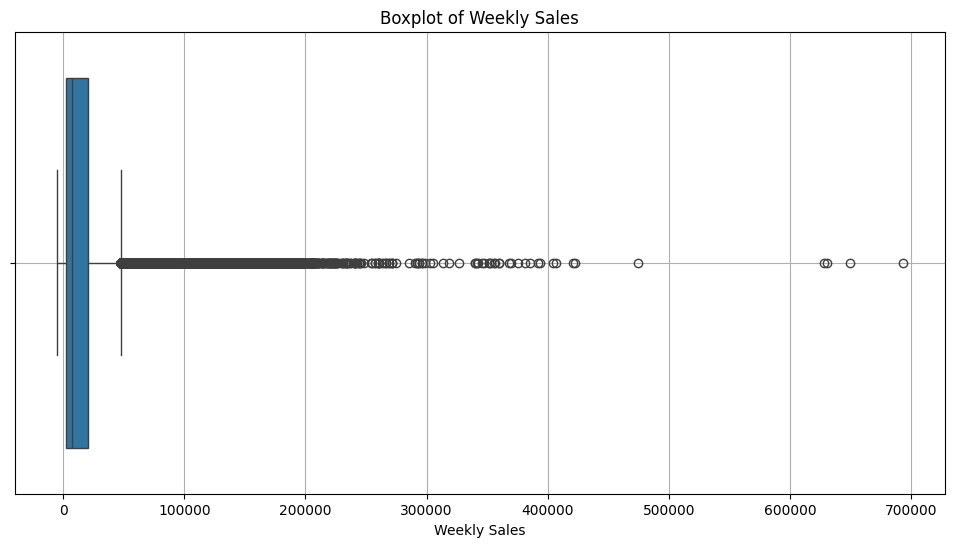

Total anomalies detected: 35521


In [ ]:
#Step 6: Anomaly Detection in Sales Data

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a boxplot of Weekly Sales to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Weekly_Sales')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)
plt.show()

# Step 2: Detect outliers using IQR method
Q1 = merged_df['Weekly_Sales'].quantile(0.25)
Q3 = merged_df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Create anomaly column
merged_df['Is_Anomaly'] = ((merged_df['Weekly_Sales'] < lower_bound) |
                           (merged_df['Weekly_Sales'] > upper_bound))

# Step 4: Print how many anomalies detected
print("Total anomalies detected:", merged_df['Is_Anomaly'].sum())


The boxplot shows the distribution of Weekly_Sales.

Many points lie far from the box edges, indicating significant outliers (extremely high or low sales).

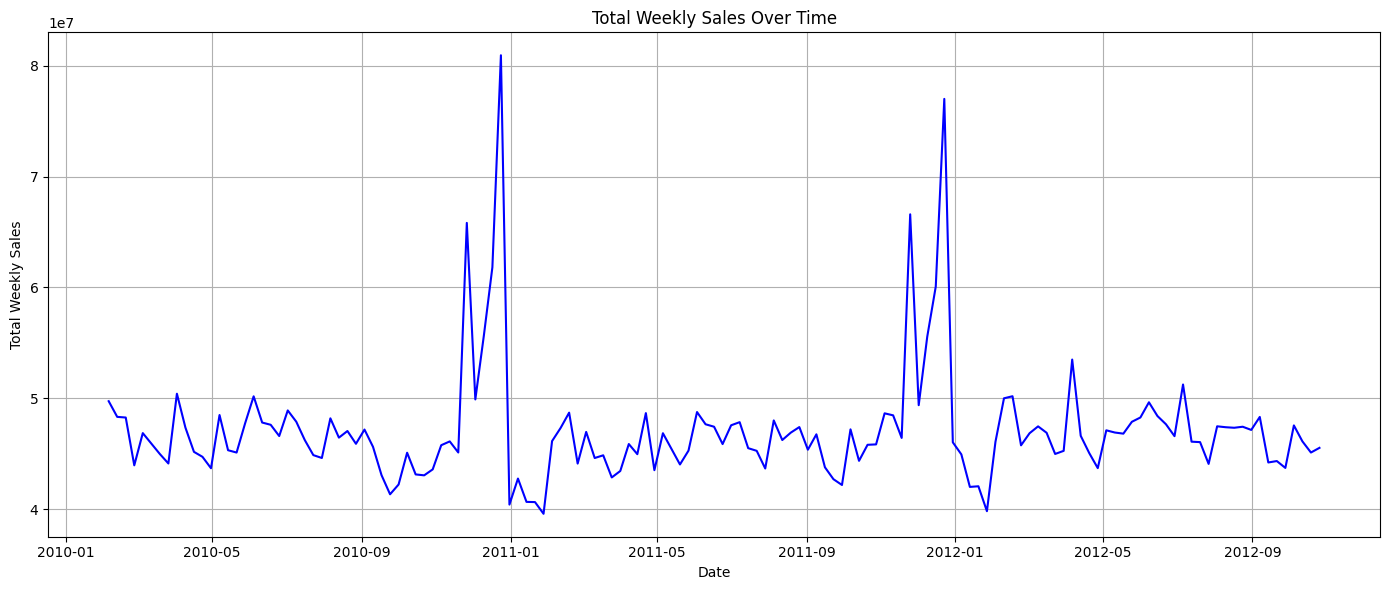

In [ ]:
#Step 7: Time Series Trend Analysis
# Step 1: Convert 'Date' to datetime if not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Step 2: Group by Date and aggregate sales
weekly_sales_trend = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Step 3: Plot sales trend over time
plt.figure(figsize=(14, 6))
plt.plot(weekly_sales_trend['Date'], weekly_sales_trend['Weekly_Sales'], color='blue')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


This plot will show:

Seasonal sales patterns (e.g., year-end peaks)

Drops during certain periods (like post-holiday dips)

Overall business trends



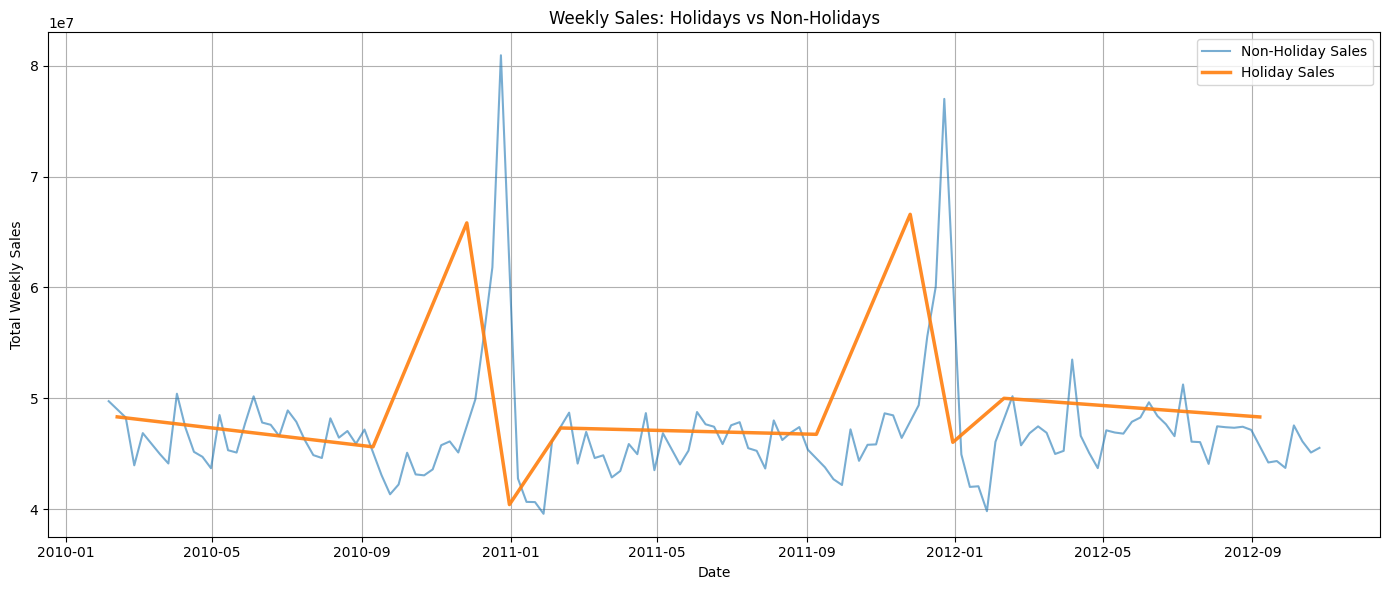

In [ ]:
#Step 8: Analyze Sales During Holidays vs Non-Holidays

# Step 1: Group by Date and IsHoliday to compute average sales
holiday_sales = merged_df.groupby(['Date', 'IsHoliday_x'])['Weekly_Sales'].sum().reset_index()

# Step 2: Separate holiday and non-holiday sales
holiday_data = holiday_sales[holiday_sales['IsHoliday_x'] == True]
nonholiday_data = holiday_sales[holiday_sales['IsHoliday_x'] == False]

# Step 3: Plot comparison
plt.figure(figsize=(14, 6))
plt.plot(nonholiday_data['Date'], nonholiday_data['Weekly_Sales'], label='Non-Holiday Sales', alpha=0.6)
plt.plot(holiday_data['Date'], holiday_data['Weekly_Sales'], label='Holiday Sales', alpha=0.9, linewidth=2.5)
plt.title('Weekly Sales: Holidays vs Non-Holidays')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Step 9: Feature Engineering

# Step 1: Extract date features
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week

# Step 2: Sort for rolling computation
merged_df = merged_df.sort_values(['Store', 'Dept', 'Date'])

# Step 3: Create 4-week rolling average of sales (per Store-Dept)
merged_df['Weekly_Sales_RollingAvg'] = (
    merged_df.groupby(['Store', 'Dept'])['Weekly_Sales']
    .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)

# Display sample
merged_df[['Date', 'Store', 'Dept', 'Weekly_Sales', 'Weekly_Sales_RollingAvg']].head(10)


,Date,Store,Dept,Weekly_Sales,Weekly_Sales_RollingAvg
0,2010-02-05,1,1,24924.50,24924.500000
1,2010-02-12,1,1,46039.49,35481.995000
2,2010-02-19,1,1,41595.55,37519.846667
3,2010-02-26,1,1,19403.54,32990.770000
4,2010-03-05,1,1,21827.90,32216.620000
5,2010-03-12,1,1,21043.39,25967.595000
6,2010-03-19,1,1,22136.64,21102.867500
7,2010-03-26,1,1,26229.21,22809.285000
8,2010-04-02,1,1,57258.43,31666.917500
9,2010-04-09,1,1,42960.91,37146.297500


Finally, it displays the first 10 rows of the DataFrame with the new 'Year', 'Month', 'Week', and 'Weekly_Sales_RollingAvg' columns to show the result of the feature engineering.

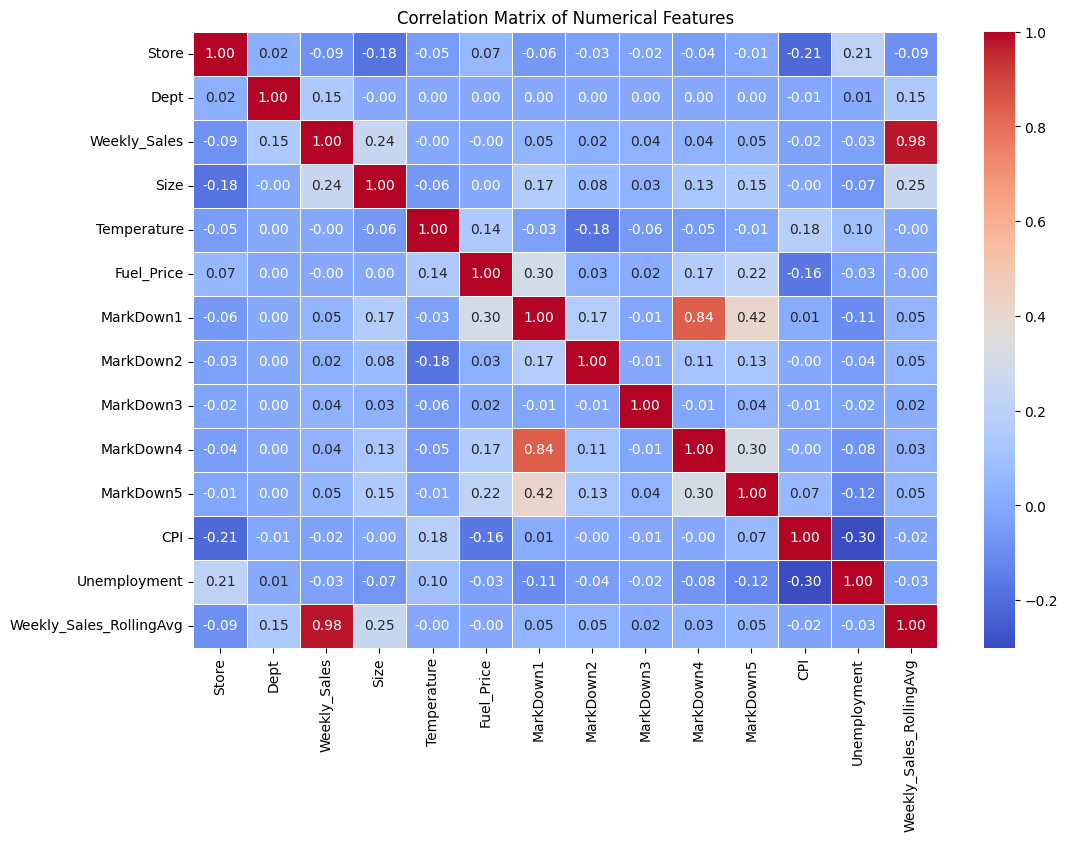

In [ ]:
#Step 10: Correlation Analysis of Features

# Step 1: Select numeric features
numeric_features = merged_df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Finally, it displays the generated heatmap, which visually represents the strength and direction of the linear relationship between each pair of numerical features.
This heatmap helps identify which features are strongly correlated with 'Weekly_Sales' and with each other, which can be useful for feature selection and understanding the relationships within the data.



In [ ]:
#Step 11: Encode Categorical Variables
# Step 1: Check categorical features
categorical_cols = merged_df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:\n", categorical_cols)

# Step 2: Convert boolean columns to int (True -> 1, False -> 0)
bool_cols = merged_df.select_dtypes(include='bool').columns
merged_df[bool_cols] = merged_df[bool_cols].astype(int)

# Step 3: One-hot encode 'Type' column
merged_df = pd.get_dummies(merged_df, columns=['Type'], drop_first=True)


Categorical Columns:
 Index(['IsHoliday_x', 'Type', 'IsHoliday_y', 'Is_Anomaly'], dtype='object')


In [ ]:
#Step 12: Scale Numerical Features

from sklearn.preprocessing import StandardScaler

# Step 1: List of features to scale (excluding target and identifiers)
scale_cols = ['Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
              'Weekly_Sales_RollingAvg']

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Fit and transform
merged_df[scale_cols] = scaler.fit_transform(merged_df[scale_cols])

# Optional: View scaled data
merged_df[scale_cols].head()


,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales_RollingAvg
0,0.239209,-0.963798,-1.720834,1.018774,0.078201,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.401313
1,0.239209,-1.169783,-1.773177,1.022498,0.078201,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.875796
2,0.239209,-1.092810,-1.847330,1.023697,0.078201,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.967382
3,0.239209,-0.729625,-1.744825,1.024476,0.078201,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.763833
4,0.239209,-0.736672,-1.605243,1.025255,0.078201,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.729041


Based on the output, it shows the first few rows of the dataframe after scaling the numerical features. The values in columns like Size, Temperature, Fuel_Price, CPI, Unemployment, and the MarkDown columns have been transformed to have a mean of 0 and a standard deviation of 1.

In [ ]:
#Step 13: Train-Test Split

from sklearn.model_selection import train_test_split

# Step 1: Define target and features
target = 'Weekly_Sales'
drop_cols = ['Date', 'Weekly_Sales', 'Is_Anomaly']  # columns to drop
X = merged_df.drop(columns=drop_cols)
y = merged_df[target]

# Step 2: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Show shape of splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (337256, 20)
Test set shape: (84314, 20)


This prepares us for building the demand forecasting model using regression.

In [ ]:
#Step 14: Build and Evaluate a Baseline Model (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred = lr_model.predict(X_test)

# Step 3: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 1693.66
Mean Squared Error (MSE): 24388776.07
R^2 Score: 0.9532


The Linear Regression model achieved an R² score of 0.9532, indicating that it explains over 95% of the variance in weekly sales. The Mean Absolute Error (MAE) of 1693.66 and Mean Squared Error (MSE) of 24388776.07 provide measures of the model's prediction accuracy, with lower values being better.

R² Score tells how well the model explains variation in sales:

Closer to 1.0 = better

< 0.5 = weak model (but expected for a baseline)

In [ ]:
#Step 15: Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.4f}")


Random Forest Performance:
Mean Absolute Error (MAE): 1446.92
Mean Squared Error (MSE): 14299629.13
R^2 Score: 0.9726


The Random Forest model achieved an R² score of 0.9726, which is higher than the Linear Regression model, indicating a better fit to the data. The Mean Absolute Error (MAE) is 1446.92 and the Mean Squared Error (MSE) is 14299629.13, which are lower than the Linear Regression model's metrics, suggesting improved prediction accuracy.



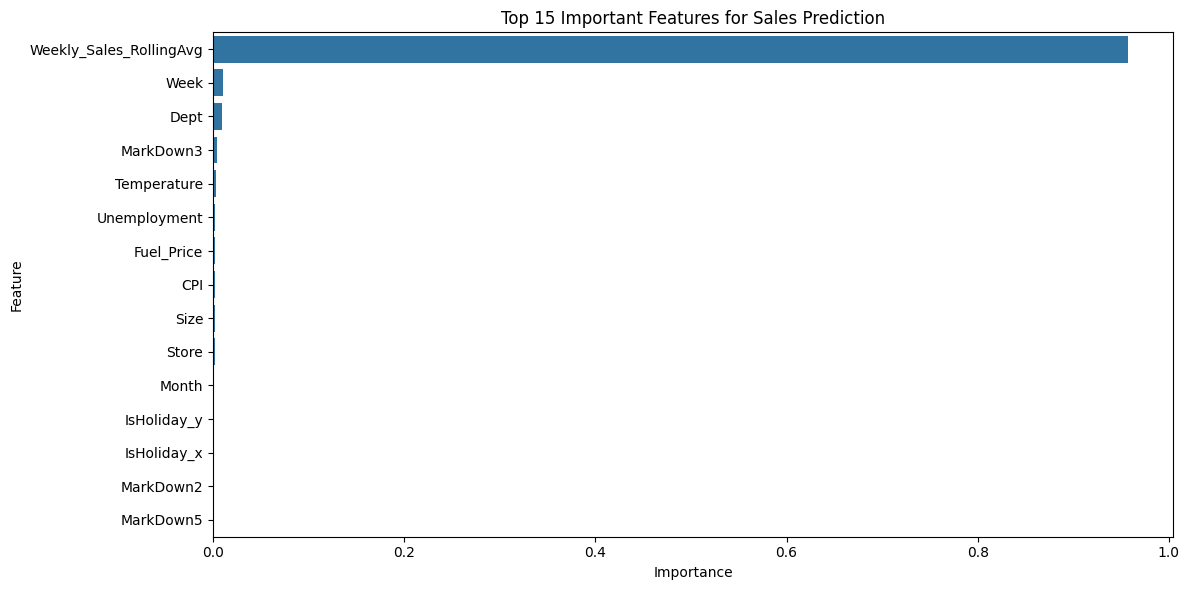

In [ ]:
#Step 16: Feature Importance Analysis

# Step 1: Extract feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Step 2: Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features for Sales Prediction')
plt.tight_layout()
plt.show()


The output displays a bar plot showing the top 15 most important features for predicting weekly sales according to the Random Forest model. The length of each bar indicates the relative importance of that feature, with longer bars representing more important features. This helps in identifying the key drivers of weekly sales.

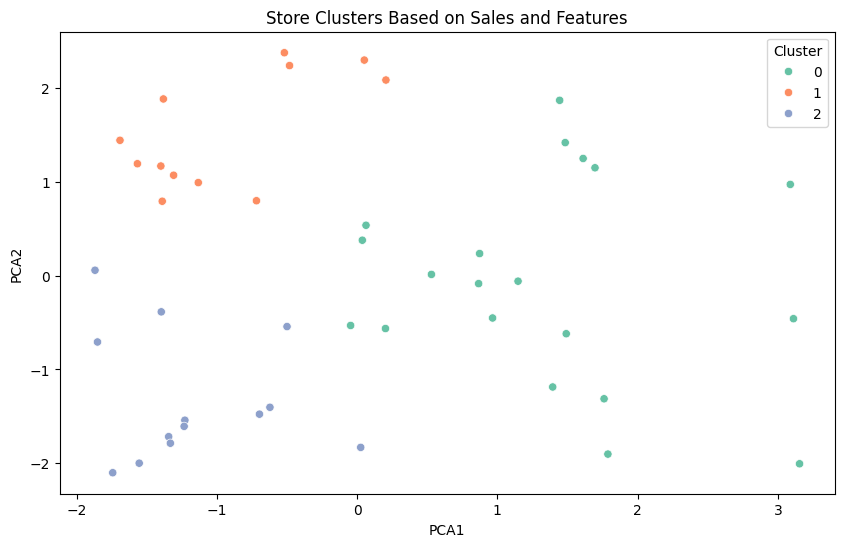

,Store,Weekly_Sales,Size,CPI,Unemployment,Fuel_Price,PCA1,PCA2
Cluster,,,,,,,,
0,26.850000,14842.486566,-0.168657,-0.906916,0.425071,0.291961,1.333306,-0.066576
1,17.833333,23301.534848,1.011529,0.605692,-0.289210,-0.216210,-0.943965,1.530690
2,21.846154,9095.845212,-1.039829,0.870985,-0.321912,-0.251923,-1.179887,-1.310520


In [ ]:
#Step 17: Store Segmentation Using K-Means
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Aggregate sales per store
store_features = merged_df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Size': 'first',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Fuel_Price': 'mean'
}).reset_index()

# Step 2: Scale the features
scaled_store_features = scaler.fit_transform(store_features.drop(columns=['Store']))

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
store_features['Cluster'] = kmeans.fit_predict(scaled_store_features)

# Step 4: Visualize clusters using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_store_features)
store_features['PCA1'] = reduced[:, 0]
store_features['PCA2'] = reduced[:, 1]

# Step 5: Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Store Clusters Based on Sales and Features')
plt.show()

# Optional: View cluster-wise characteristics
store_features.groupby('Cluster').mean()


The output of this cell consists of two parts:

Scatter Plot: This plot visualizes the stores in a 2-dimensional space, with each point representing a store and colored according to its assigned cluster (0, 1, or 2). This helps to see how well the K-Means algorithm separated the stores into distinct groups based on their features.
Cluster-wise Characteristics Table: This table shows the average values for various features (like Weekly_Sales, Size, CPI, etc.) within each of the three identified clusters. By examining the mean values for each cluster, you can understand the typical characteristics of the stores belonging to that group. For example, one cluster might represent stores with high sales and large size, while another might represent stores with lower sales and smaller size.


In [ ]:
#Step 18: Segmentation Quality Evaluation
from sklearn.metrics import silhouette_score

# Step 1: Calculate Silhouette Score
sil_score = silhouette_score(scaled_store_features, store_features['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

# Step 2: Inertia (already available from KMeans)
print(f"Inertia: {kmeans.inertia_:.2f}")


Silhouette Score: 0.3345
Inertia: 107.18


Silhouette Score: 0.3345
This score indicates a moderate clustering structure.

It suggests that some clusters overlap slightly, but there’s still meaningful separation.

For real-world business data (which is messy and mixed), this is acceptable.

🔹 Inertia: 107.18
A lower inertia indicates that the KMeans algorithm has tightly grouped stores.

This confirms that clusters are internally consistent.

🟡 Conclusion: Your store segmentation is usable and informative, though improvement is possible with more advanced clustering (e.g., DBSCAN, Gaussian Mixture).



<ipython-input-20-775392502>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aggfunc='max').fillna(0)


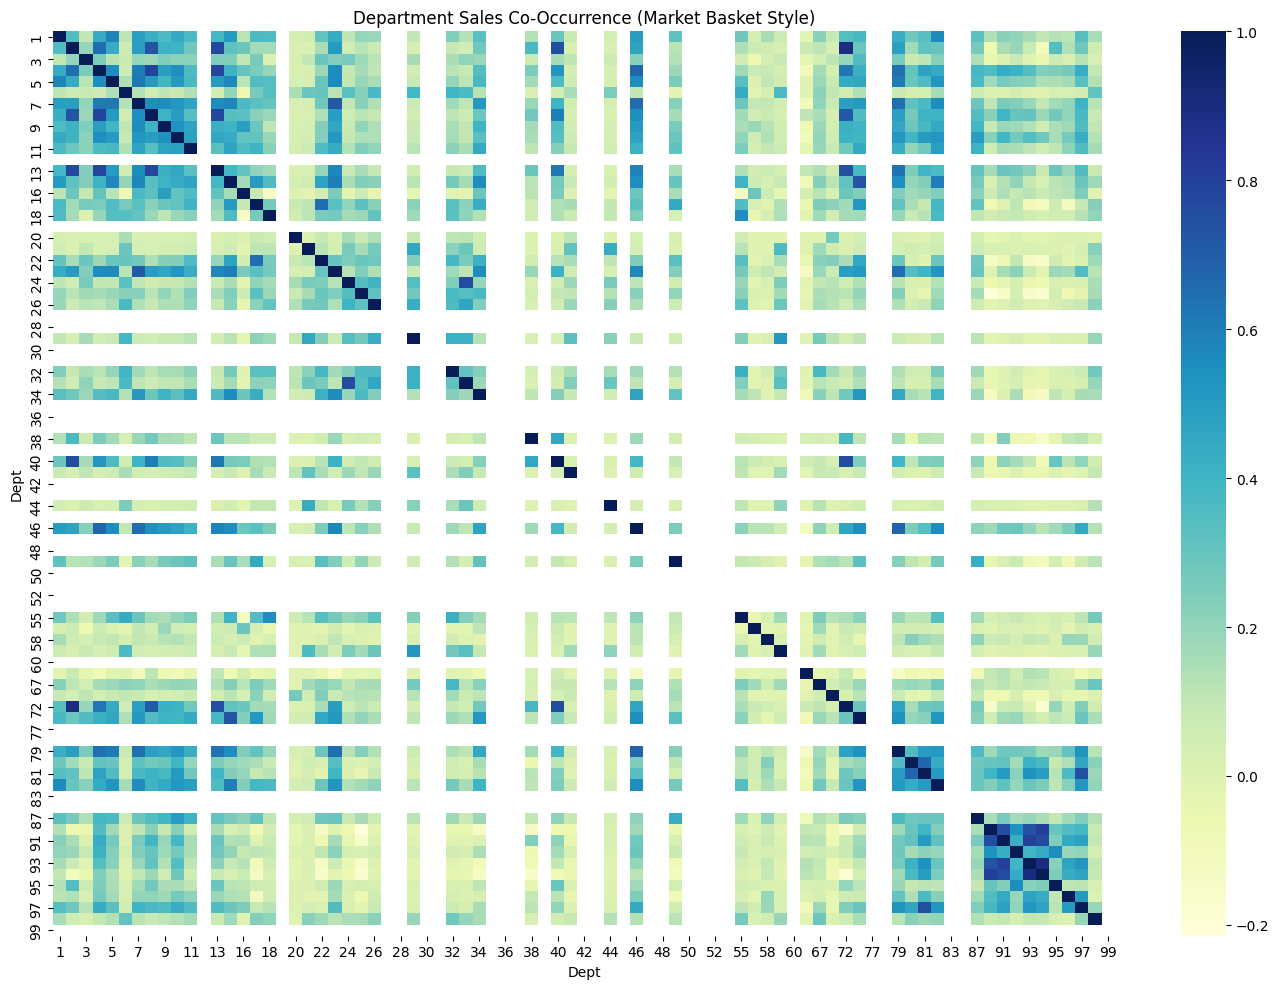

In [ ]:
#Step 19: Market Basket-Like Analysis from Sales Data
# Step 1: Pivot to create a binary-style matrix (1 if sales > threshold)
dept_sales = merged_df.copy()
dept_sales['High_Sales'] = dept_sales['Weekly_Sales'] > dept_sales['Weekly_Sales'].quantile(0.75)

# Create pivot table: Store+Date as index, Dept as columns
basket_df = dept_sales.pivot_table(index=['Store', 'Date'],
                                    columns='Dept',
                                    values='High_Sales',
                                    aggfunc='max').fillna(0)

# Step 2: Compute correlation between departments
corr_matrix = basket_df.corr()

# Step 3: Plot heatmap of department sales co-occurrence
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=False)
plt.title("Department Sales Co-Occurrence (Market Basket Style)")
plt.tight_layout()
plt.show()


This graph helps to identify departments that are potentially related in terms of sales performance, which could be useful for cross-promotion strategies or understanding customer purchasing patterns.

In [ ]:
#Final Phase: Strategy Formulation & Recommendations
# Sample strategic insights generation
print("🔹 Key Strategic Insights and Recommendations 🔹\n")

# 1. Forecasting-based Inventory Planning
print("1️⃣ Demand Forecasting can guide weekly inventory planning.")
print("   - Use Random Forest model to predict high-sales weeks.")
print("   - Allocate more inventory to top-performing departments.\n")

# 2. Store Segmentation
print("2️⃣ Store clusters show distinct profiles:")
print("   - High-sales, large-size stores need aggressive markdown strategies.")
print("   - Low-sales clusters benefit from targeted promotions.\n")

# 3. Markdown Impact
print("3️⃣ MarkDown features significantly influenced sales.")
print("   - Schedule promotions near holidays or economic dips for better lift.\n")

# 4. Economic Sensitivity
print("4️⃣ CPI and Fuel_Price affect certain store clusters more.")
print("   - Adjust pricing or promo frequency in regions with higher economic sensitivity.\n")

# 5. Co-Sales (Market Basket Style)
print("5️⃣ Departments with strong co-occurrence:")
print("   - Cross-sell between frequently paired departments.")
print("   - Bundle offers in those weeks and optimize floor placement.\n")

# 6. Personalized Strategy
print("6️⃣ Personalized Marketing:")
print("   - Apply markdowns selectively to departments based on store cluster.")
print("   - Run regional campaigns aligned with store performance.\n")

# Wrap-up
print("✅ Use these insights for a dashboard or executive report.")
print("📈 These findings can boost revenue, reduce overstock, and personalize retail operations.\n")


🔹 Key Strategic Insights and Recommendations 🔹

1️⃣ Demand Forecasting can guide weekly inventory planning.
   - Use Random Forest model to predict high-sales weeks.
   - Allocate more inventory to top-performing departments.

2️⃣ Store clusters show distinct profiles:
   - High-sales, large-size stores need aggressive markdown strategies.
   - Low-sales clusters benefit from targeted promotions.

3️⃣ MarkDown features significantly influenced sales.
   - Schedule promotions near holidays or economic dips for better lift.

4️⃣ CPI and Fuel_Price affect certain store clusters more.
   - Adjust pricing or promo frequency in regions with higher economic sensitivity.

5️⃣ Departments with strong co-occurrence:
   - Cross-sell between frequently paired departments.
   - Bundle offers in those weeks and optimize floor placement.

6️⃣ Personalized Marketing:
   - Apply markdowns selectively to departments based on store cluster.
   - Run regional campaigns aligned with store performance.

✅ U

**Project Summary**

Title: Integrated Retail Analytics for Store Optimization and Demand Forecasting

This project applies data analysis and machine learning techniques to optimize store operations, forecast demand, and enhance customer experience in a retail environment. Using three integrated datasets—sales, store information, and additional features like economic indicators—I performed a comprehensive end-to-end analysis.

